<h3><center>Федеральное государственное бюджетное образовательное учреждение
<center>высшего образования
<center>"Финансовый университет при Правительстве 
<center>Российской Федерации"
<center>Департамент анализа данных и машинного обучения

<h3><center>Курсовая работа
<center>по дисциплине "Машинное обучение" 
<center>на тему: 
<center>"Использование методов машинного обучения для решения задачи выделения атрибутов товаров из текста"<center>

## ***<center> Введение***

####  _В современном мире с ростом электронной коммерции объемы информации о товарах, представленных в интернет-магазинах, постоянно увеличиваются. Для упрощения и ускорения поиска необходимой информации покупателями и снижения нагрузки на персонал магазинов, возникает задача автоматического выделения атрибутов товаров из описаний их характеристик, содержащихся в текстовых полях. Решение этой задачи с помощью методов машинного обучения может значительно упростить процесс поиска и сравнения товаров, а также повысить качество рекомендаций, которые система может предложить покупателю. В данной курсовой работе будет рассмотрено применение методов машинного обучения для решения задачи выделения атрибутов товаров из текстовых данных, различные подходы к решению задачи, оценены их достоинства и недостатки, а также проведено сравнение полученных результатов._

### ***<center> Цель работы***

#### _Целью данной работы является исследование и применение методов машинного обучения для решения задачи выделения атрибутов товаров из текстовых данных, а также разработка и оценка моделей, способных автоматически извлекать необходимые сущности._

### ***<center> Задачи***

Задачи, которые будут решаться в рамках данной работы, включают в себя: 
+ Сбор и обработка данных 
+ Основы Natural Language Processing'а:
    + Нормализация (приведение слов к нижнему регистру, удаление всей пунктуации)
    + Лемматизация (удаление стоп, приведение слов к нормальной форме)
    + bow (bag-of-words) (векторизация)
    + токенизация по словам
+ Ручная разметка и сбор сэмпла
+ Обработка разметочной выборки
+ Обучение и подбор различных моделей машинного обучения
+ Тюн параметров этих моделей с помощью перебора (GridSearchCV)
+ Алгоритм ребалансировки классов 
+ Вывод результатов всех моделей

### ***<center> Содержание***

* [1. Importing](#1) 

* [2. Data Preprocessing](#2)


* [3. Normalization/Lemmatization](#3)

    
* [4. Markup](#4)

* [5. Creating a sample](#5)


* [6. Markup Preprocessing](#6)


* [7. Vectorization](#7)


* [8. Model Training](#8)
    * [8.1. Logistic Regression](#8.1)
    * [8.2. Decision Tree](#8.2)
    * [8.3. Random Forest](#8.3)
    * [8.4. K Neighbors Classifier](#8.4)
    * [8.5. Support Vector Machine](#8.5)
    * [8.6. MLP](#8.6)
    * [8.7. Result](#8.7)


* [9. Grid Search](#9)
    * [9.1. Logistic Regression](#9.1)
    * [9.2. Random Forest](#9.2)
    * [9.3. Support Vector Machine](#9.3)
    
* [10. Oversampling](#10)
    * [10.1. Logistic Regression](#10.1)
    * [10.2. Finish Result](#10.2)
   
* [11. Final GridSearch](#11)

* [12.Conclusion](#12)

<a id="1"></a>
# <b>1 <span style='color:#43a842'>|</span> Importing</b>
* [Оглавление](#0)

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re

import pymorphy2
import nltk
from nltk.corpus import stopwords

from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## <b>2 <span style='color:#43a842'>|</span> Data Preprocessing</b>
* [Оглавление](#0)

In [642]:
first_df = pd.read_json('/Users/ivanlopatkin/Downloads/supl_biz_157k.json')
first_df.head(2)

,ID,Title,Price,Presence,Goods_rating,Info,Nesting_type_tags,Provider,Provider_address,Last_provider_activity,Link_to_provider,Link_to_good,Attached_files
0,9513200,Доска пола; Имитация бруса; Блок-хаус; Декинг;...,33 800 руб.,В наличии,Популярный товар,"[Толщина (мм): 20/45, ширина (мм): 90/135/140,...","[Товары и услуги, Строительные материалы, Пого...","Сибирский лес, торгово-строительная компания (...","Барнаул, г.Новоалтайск, ул.Промплощадка,13а",Был на сайте 31.10.2022,https://supl.biz/profiles/1223111/,https://supl.biz/doska-pola-imitatsiya-brusa-b...,NaN
1,26390427,"Вагонка, блок хаус, доска пола, строганная дос...",Цена по запросу,В наличии,Популярный товар,"[Продаем погонажные изделия хвойных пород, шир...","[Товары и услуги, Строительные материалы, Пого...",ООО Лестех43,Киров,Был на сайте 18.10.2022,https://supl.biz/profiles/1983162/,https://supl.biz/vagonka-blok-haus-doska-pola-...,https://suplbiz-a.akamaihd.net/media/proposals...


In [643]:
first_df.shape[0]

157068

In [644]:
friendly_df = first_df[['Title', 'Info']]

In [645]:
friendly_df.dropna(inplace=True)

In [646]:
friendly_df.head(1)

,Title,Info
0,Доска пола; Имитация бруса; Блок-хаус; Декинг;...,"[Толщина (мм): 20/45, ширина (мм): 90/135/140,..."


<a id="3"></a>
## <b>3 <span style='color:#43a842'>|</span> Normalization/Lemmatization </b>
* [Оглавление](#0)

##### Removing all punctuation from the title

In [647]:
friendly_df['Title'] = friendly_df['Title'].apply(
    lambda x: 
    re.sub(r'[^\w\s]', '', x)
)

In [648]:
friendly_df.head(1)

,Title,Info
0,Доска пола Имитация бруса Блокхаус Декинг Стро...,"[Толщина (мм): 20/45, ширина (мм): 90/135/140,..."


In [649]:
morph = pymorphy2.MorphAnalyzer()

In [650]:
nltk.download('stopwords')
stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivanlopatkin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Removing all stop words from the title (lemmatization) and lowercase words (normalization)

In [651]:
friendly_df['Title'] = friendly_df['Title'].apply(
    lambda x:
    ' '.join([word.lower() for word in x.split() if not word in stop_words and len(word) > 2])
)

In [652]:
friendly_df.head()

,Title,Info
0,доска пола имитация бруса блокхаус декинг стро...,"[Толщина (мм): 20/45, ширина (мм): 90/135/140,..."
1,вагонка блок хаус доска пола строганная доска ...,"[Продаем погонажные изделия хвойных пород, шир..."
2,погонажные изделия вагонка евровагонка имитаци...,[Собственное производство в Архангельской обла...
3,технические входные двери,[Двери входные технические металлические для ...
4,тротуарная плитка искусственный камень,[Компания ООО Ингстром производит тротуарную п...


##### Lemmatization of all words

In [324]:
friendly_df['Norm_Title'] = friendly_df['Title'].apply(
    lambda x: 
    [morph.parse(token)[0].normal_form for token in x.split()]
)

In [343]:
friendly_df['Title'][200], friendly_df['Norm_Title'][200]

('Открою ключ интернетмагазин морепродуктов дней',
 ['откроить', 'ключ', 'интернетмагазин', 'морепродукт', 'день'])

<a id="4"></a>
## <b>4 <span style='color:#43a842'>|</span> Markup </b>
* [Оглавление](#0)

In [627]:
friendly_df['markup'] = pd.Series(np.nan)

In [129]:
def razmetka(indexs : list, df):
    copy = df.copy()
    i = indexs[0]
    ser = df.markup
    while i != indexs[1]:
            title = df.loc[float(str(i))].Norm_Title
            info  = df.loc[float(str(i))].Info
            print('Название: ', *title)
            s = input()
            if s.lower() == 'стоп':
                df['markup'] = ser
                flag = False
                break
            elif s.lower() == 'скип':
                i +=1
                continue
            else:

                s = s.split()
                if len(s) != len(title) and s[-1] != '1':
                    print('Не все значение размечены')
                elif s[-1] == '1':
                    s = s + ['-'] * (len(title) - len(s))
                    ser[i] = str(dict(zip(title, s)))
                    i +=1

                else:
                    ser[i] = str(dict(zip(title, s)))
                    i +=1
    df['markup'] = ser

In [331]:
friendly_df.shape

(157067, 4)

The first test of markup

In [339]:
import random
while True:
    number = random.randint(0, friendly_df.shape[0])
    razmetka([number, number + 1], friendly_df)

Название:  станция насосный


 тов назн


Название:  валик 640100 56889 полиакрил зелёный ворс15мм100 maxitool


 стоп


Название:  кондиционер energolux sas07bd1altsau07bd1altws30


Process SpawnPoolWorker-60:
Process SpawnPoolWorker-59:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/ivanlopatkin/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/ivanlopatkin/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/ivanlopatkin/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ivanlopatkin/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ivanlopatkin/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/ivanlopatkin/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/ivanlopatkin/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 364

KeyboardInterrupt: Interrupted by user

##### Import of markup by Ustinov Kirill Evgenievich (Было разрешено Никитой Владимировичем)

In [6]:
half_metka = pd.read_json('/Users/ivanlopatkin/Downloads/23_04.json')

In [7]:
half_metka.head()

,Info,Norm_Title,Razme4
0,"[Толщина (мм): 20/45, ширина (мм): 90/135/140,...","[доска, пол, имитация, брус, блокхаус, декинг,...",None
1,"[Продаем погонажные изделия хвойных пород, шир...","[вагонка, блок, хаус, доска, пол, строгать, до...",None
2,[Собственное производство в Архангельской обла...,"[погонажный, изделие, вагонка, евровагонка, им...",None
3,[Двери входные технические металлические для ...,"[технический, входной, дверь]",None
4,[Компания ООО Ингстром производит тротуарную п...,"[тротуарный, плитка, искусственный, камень]",None


In [8]:
with_metka = half_metka[half_metka.Razme4.isna() == False]

In [9]:
for i in with_metka.iterrows():
    print(i[1][2])

{'аквавошер': 'тов', 'clean': 'бренд', 'cube': 'бренд', 'рro': 'бренд', 'для': '-', 'стиральный': 'назн', 'машина': '-'}
{'жёсткий': 'тов', 'диск': 'тов', '500': '-', 'гб': 'раз'}
{'жёсткий': 'тов', 'диск': 'тов', '1x2tb': 'раз', 'sata': 'бренд', 'гарантия': '1', '1': '-', 'год': '-'}
{'заправка': 'тов', 'картридж': 'тов', 'cf212a': 'бренд', 'hp': 'бренд'}
{'заправка': 'тов', 'картридж': 'тов'}
{'тэн': 'тов', 'стиральный': 'назн', 'машина': 'тов', 'универсальный': '-', '1700w': 'разм'}
{'запчасть': 'тов', 'для': '-', 'бытовой': 'наз', 'техника': 'тов'}
{'ремонт': 'тов', 'стиральный': 'наз', 'машина': 'тов', 'indesit': 'бренд', 'индезита': 'бренд'}
{'фильтр': 'тов', 'для': '-', 'вода': '-', 'посудомоечный': 'назн', 'и': '-', 'стиральный': 'наз', 'машина': '-', 'ariston': 'бренд', '91845': '-'}
{'стиральный': 'назн', 'машина': 'тов', 'indesit': 'бренд', 'iwuc': '1', '4105': '-'}
{'жёсткий': 'тов', 'диск': 'тов', 'toshiba': 'бренд', 'p300': '-'}
{'заправка': 'тов', 'картридж': 'тов'}
{'за

##### My part of the markup (после перезапуска ячеек слетели input'ы, именно из-за этого через 3 ячейки я закоммитился)

In [10]:
import random
while True:
    number = random.randint(0, 104000)
    razmetka([number, number + 1], half_metka)

NameError: name 'razmetka' is not defined

In [19]:
with_metka = half_metka[half_metka.Razme4.isna() == False]
with_metka.shape

(166, 3)

Saving data for later use

In [ ]:
with_metka.to_csv('282_mechennih')

In [21]:
with open('/Users/ivanlopatkin/Open source zone/282_mechennih_js', 'r', encoding='utf-8') as f:
    with_metka = json.load(f)

<a id="5"></a>
## <b>5 <span style='color:#43a842'>|</span> Creating a sample </b>
* [Оглавление](#0)

In [107]:
df = pd.DataFrame({'Tag': [], 'Target': []})
count = 0
tag_list, target_list = [], []
for i in with_metka['Razme4'].values():
    if len(i) in (np.arange(38, 10**3)):
        continue
    count += 1
    for key, value in dict(i).items():
        tag_list.append(key)
        target_list.append(value)

In [108]:
df.Tag = tag_list
df.Target = target_list

<a id="6"></a>
## <b>6 <span style='color:#43a842'>|</span> Markup Preprocessing</b>
* [Оглавление](#0)

Consequences of manual marking

In [109]:
df.Target.unique()

array(['тов', 'бренд', '-', 'назн', 'раз', '1', 'разм', 'наз', 'тип',
       'мат', 'гор', 'мод', 'товар', 'размер', 'материал', 'модель',
       'гост', 'цвет', 'бред'], dtype=object)

In [110]:
def replace_word(true_word, false_word):
    df.Target = df.Target.apply(lambda x: true_word if x == false_word else x)

In [111]:
replace_word('тов', 'товар')
replace_word('назн', 'наз')
replace_word('бренд', 'бред')
replace_word('мод', 'модель')
replace_word('мат', 'материал')
replace_word('разм', 'размер')
replace_word('разм', 'раз')
replace_word('-', '1')

In [112]:
df['Target'].value_counts()

-        349
тов      188
тип       93
назн      82
разм      63
мод       53
бренд     40
мат       37
гор        3
гост       3
цвет       1
Name: Target, dtype: int64

In [113]:
df = df[df.Target != '-']
df = df[df.Target != 'гост']
df = df[df.Target != 'цвет']
df = df[df.Target != 'гор']

In [114]:
df['Target'].value_counts()

тов      188
тип       93
назн      82
разм      63
мод       53
бренд     40
мат       37
Name: Target, dtype: int64

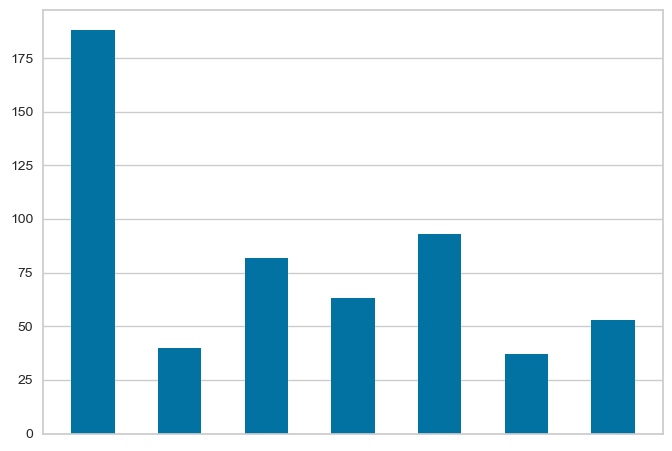

In [115]:
plt.hist(df['Target'], bins=df['Target'].nunique(), rwidth=0.5)
plt.xticks([])
plt.show()

<a id="7"></a>
## <b>7 <span style='color:#43a842'>|</span> Vectorization</b>
* [Оглавление](#0)

In [116]:
y = df['Target']
X = df['Tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [117]:
vec = CountVectorizer(ngram_range=(1, 1)) # Convert a collection of text documents to a matrix of token counts
bow = vec.fit_transform(X_train)

In [118]:
list(vec.vocabulary_.items())[:10]

[('полиуретановый', 172),
 ('сменный', 198),
 ('размер', 188),
 ('портальный', 176),
 ('сх4013', 212),
 ('страхование', 205),
 ('11x300x1600', 1),
 ('контейнер', 125),
 ('новостройка', 150),
 ('радиатор', 187)]

<a id="8"></a>
## <b>8 <span style='color:#43a842'>|</span> Model Training</b>
* [Оглавление](#0)

# <a id="8.1"></a>
### <b>8.1 <span style='color:#43a842'>|</span> Logistic Regression</b>
* [Оглавление](#0)

In [119]:
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(bow, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [120]:
y_pred = clf.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       бренд       0.08      1.00      0.14         1
         мат       0.40      0.80      0.53         5
         мод       0.18      0.67      0.29         3
        назн       0.68      0.94      0.79        16
        разм       0.23      0.50      0.32         6
         тип       0.26      0.75      0.39         8
         тов       1.00      0.47      0.64       100

    accuracy                           0.56       139
   macro avg       0.40      0.73      0.44       139
weighted avg       0.84      0.56      0.61       139



# <a id="8.2"></a>
### <b>8.2 <span style='color:#43a842'>|</span> Decision Tree</b>
* [Оглавление](#0)

In [39]:
dt = DecisionTreeClassifier(random_state=42).fit(bow, y_train)

In [40]:
y_pred = dt.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       бренд       0.31      1.00      0.47         4
         мат       0.40      0.67      0.50         6
         мод       0.18      0.67      0.29         3
        назн       0.68      0.88      0.77        17
        разм       1.00      0.19      0.33        67
         тип       0.22      0.71      0.33         7
         тов       0.70      0.94      0.80        35

    accuracy                           0.55       139
   macro avg       0.50      0.72      0.50       139
weighted avg       0.78      0.55      0.51       139



# <a id="8.3"></a>
### <b>8.3 <span style='color:#43a842'>|</span> Random Forest</b>
* [Оглавление](#0)

In [41]:
rf = RandomForestClassifier(random_state=42).fit(bow, y_train)

In [42]:
y_pred = rf.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       бренд       0.31      1.00      0.47         4
         мат       0.40      0.67      0.50         6
         мод       0.18      0.67      0.29         3
        назн       0.68      0.94      0.79        16
        разм       1.00      0.19      0.33        67
         тип       0.26      0.75      0.39         8
         тов       0.70      0.94      0.80        35

    accuracy                           0.55       139
   macro avg       0.50      0.74      0.51       139
weighted avg       0.78      0.55      0.51       139



# <a id="8.4"></a>
### <b>8.4 <span style='color:#43a842'>|</span> K Neighbors Classifier</b>
* [Оглавление](#0)

In [43]:
kn_clf = KNeighborsClassifier().fit(bow, y_train)

In [44]:
y_pred = kn_clf.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       бренд       0.08      1.00      0.14         1
         мат       0.40      0.80      0.53         5
         мод       0.00      0.00      0.00         0
        назн       0.55      0.92      0.69        13
        разм       1.00      0.14      0.24        95
         тип       0.09      0.50      0.15         4
         тов       0.45      1.00      0.62        21

    accuracy                           0.38       139
   macro avg       0.37      0.62      0.34       139
weighted avg       0.82      0.38      0.35       139



# <a id="8.5"></a>
### <b>8.5 <span style='color:#43a842'>|</span> Support Vector Machine</b>
* [Оглавление](#0)

In [45]:
svc = SVC(random_state=42).fit(bow, y_train)

In [46]:
y_pred = svc.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       бренд       0.31      1.00      0.47         4
         мат       0.40      0.67      0.50         6
         мод       0.18      0.67      0.29         3
        назн       0.68      0.94      0.79        16
        разм       1.00      0.19      0.33        67
         тип       0.26      0.75      0.39         8
         тов       0.70      0.94      0.80        35

    accuracy                           0.55       139
   macro avg       0.50      0.74      0.51       139
weighted avg       0.78      0.55      0.51       139



# <a id="8.6"></a>
### <b>8.6 <span style='color:#43a842'>|</span> MLP</b>
* [Оглавление](#0)

In [124]:
mlp = MLPClassifier(random_state=42).fit(bow, y_train)

In [125]:
y_pred = mlp.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       бренд       0.31      1.00      0.47         4
         мат       0.40      0.67      0.50         6
         мод       0.18      0.67      0.29         3
        назн       0.68      0.94      0.79        16
        разм       1.00      0.19      0.33        67
         тип       0.26      0.75      0.39         8
         тов       0.70      0.94      0.80        35

    accuracy                           0.55       139
   macro avg       0.50      0.74      0.51       139
weighted avg       0.78      0.55      0.51       139



<a id="8.7"></a>
### <b>8.7 <span style='color:#43a842'>|</span> Result</b>
* [Оглавление](#0)

In [126]:
df = pd.DataFrame({'Models': ['Logistic Regression',
                             'Decision Tree',
                             'Random Forest',
                             'K Neighbors',
                             'Support Vec', 
                             'MLP'],
                  'Accuracy': [accuracy_score(y_test, clf.predict(vec.transform(X_test))),
                              accuracy_score(y_test, dt.predict(vec.transform(X_test))),
                              accuracy_score(y_test, rf.predict(vec.transform(X_test))),
                              accuracy_score(y_test, kn_clf.predict(vec.transform(X_test))),
                              accuracy_score(y_test, svc.predict(vec.transform(X_test))), 
                              accuracy_score(y_test, mlp.predict(vec.transform(X_test)))],
                  'f1_macro': [f1_score(y_test, clf.predict(vec.transform(X_test)), average='macro'),
                              f1_score(y_test, dt.predict(vec.transform(X_test)), average='macro'),
                              f1_score(y_test, rf.predict(vec.transform(X_test)), average='macro'),
                              f1_score(y_test, kn_clf.predict(vec.transform(X_test)), average='macro'),
                              f1_score(y_test, svc.predict(vec.transform(X_test)), average='macro'),
                              f1_score(y_test, mlp.predict(vec.transform(X_test)), average='macro')],
                  'f1_weighted': [f1_score(y_test, clf.predict(vec.transform(X_test)), average='weighted'),
                              f1_score(y_test, dt.predict(vec.transform(X_test)), average='weighted'),
                              f1_score(y_test, rf.predict(vec.transform(X_test)), average='weighted'),
                              f1_score(y_test, kn_clf.predict(vec.transform(X_test)), average='weighted'),
                              f1_score(y_test, svc.predict(vec.transform(X_test)), average='weighted'),
                              f1_score(y_test, mlp.predict(vec.transform(X_test)), average='weighted')]})

In [127]:
df

,Models,Accuracy,f1_macro,f1_weighted
0,Logistic Regression,0.561151,0.441960,0.509098
1,Decision Tree,0.546763,0.498392,0.582047
2,Random Forest,0.561151,0.505144,0.590385
3,K Neighbors,0.381295,0.338349,0.416134
4,Support Vec,0.553957,0.508964,0.594147
5,MLP,0.553957,0.508964,0.594147


# <a id="9"></a>
## <b>9 <span style='color:#43a842'>|</span> Grid Search</b>
* [Оглавление](#0)

In [49]:
def get_metrics(model, title):
    met = pd.DataFrame({'Models': [title], 
                            'Accuracy': accuracy_score(y_test, model.predict(vec.transform(X_test))), 
                            'f1_macro': f1_score(y_test, model.predict(vec.transform(X_test)), average='macro'), 
                            'f1_weighted': f1_score(y_test, model.predict(vec.transform(X_test)), average='weighted')})
    return met

# <a id="9.1"></a>
### <b>9.1 <span style='color:#43a842'>|</span> Logistic Regression</b>
* [Оглавление](#0)

In [50]:
params = {"C": [0.01, 0.1, 1, 10, 100, 1000], 
      "penalty": ['l1', 'l2', 'elasticnet'],
      "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [51]:
%%time
search = GridSearchCV(clf, params, cv=10).fit(bow, y_train)

CPU times: user 18.9 s, sys: 60 ms, total: 19 s
Wall time: 19 s


In [52]:
search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [53]:
best_lr = search.best_estimator_

In [54]:
get_metrics(best_lr, 'Remastered LR')

,Models,Accuracy,f1_macro,f1_weighted
0,Remastered LR,0.561151,0.505144,0.590385


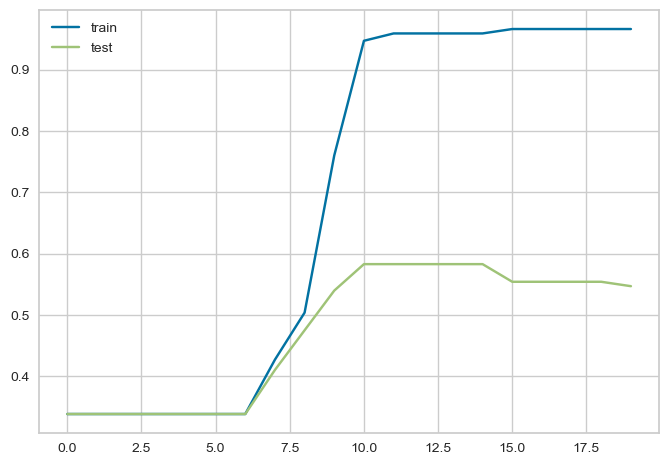

In [55]:
trains = []
tests = []
for i in np.logspace(-3, 3, 20):
    lr = LogisticRegression(C=i).fit(bow, y_train)
    trains.append(accuracy_score(y_train, lr.predict(vec.transform(X_train))))
    tests.append(accuracy_score(y_test, lr.predict(vec.transform(X_test))))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# <a id="9.2"></a>
### <b>9.2 <span style='color:#43a842'>|</span> Random Forest</b>
* [Оглавление](#0)

In [56]:
params = {'max_depth': range(1, 100), 'min_samples_split': range(1, 10)}

In [57]:
%%time
search = RandomizedSearchCV(rf, params, cv=5).fit(bow, y_train)

CPU times: user 3.76 s, sys: 30.2 ms, total: 3.79 s
Wall time: 3.79 s


In [58]:
search.best_params_

{'min_samples_split': 9, 'max_depth': 96}

In [59]:
best_rf = search.best_estimator_

In [60]:
get_metrics(best_rf, 'Remastered RF')

,Models,Accuracy,f1_macro,f1_weighted
0,Remastered RF,0.561151,0.505144,0.590385


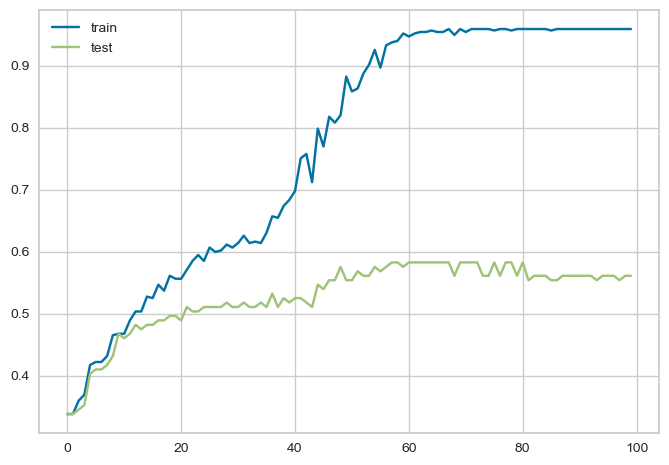

In [61]:
trains = []
tests = []
for depth in np.linspace(1, 101, 100):
    rf = RandomForestClassifier(max_depth=depth).fit(bow, y_train)
    trains.append(accuracy_score(y_train, rf.predict(vec.transform(X_train))))
    tests.append(accuracy_score(y_test, rf.predict(vec.transform(X_test))))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# <a id="9.3"></a>
### <b>9.3 <span style='color:#43a842'>|</span> Support Vector Machine</b>
* [Оглавление](#0)

In [62]:
params= {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [63]:
%%time
search = GridSearchCV(svc, params, cv=10).fit(bow, y_train)

CPU times: user 1.59 s, sys: 11 ms, total: 1.6 s
Wall time: 1.6 s


In [64]:
search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [65]:
best_svc = search.best_estimator_

In [66]:
get_metrics(best_svc, 'Remastered SVC')

,Models,Accuracy,f1_macro,f1_weighted
0,Remastered SVC,0.553957,0.508964,0.594147


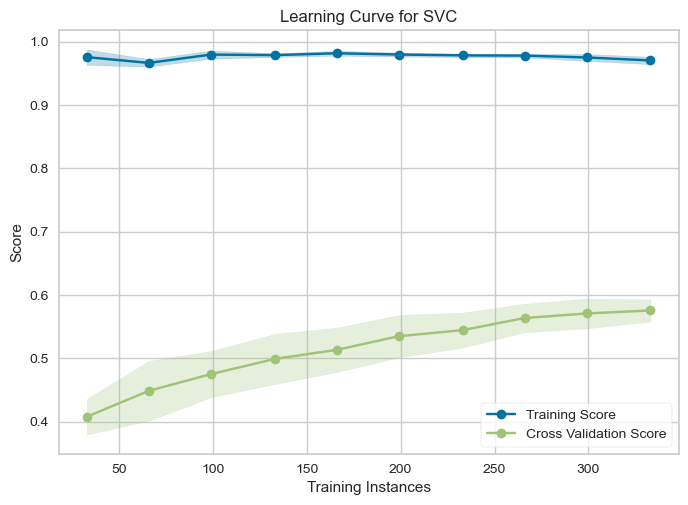

In [67]:
visualizer = LearningCurve(
    SVC(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(bow, y_train).show() 

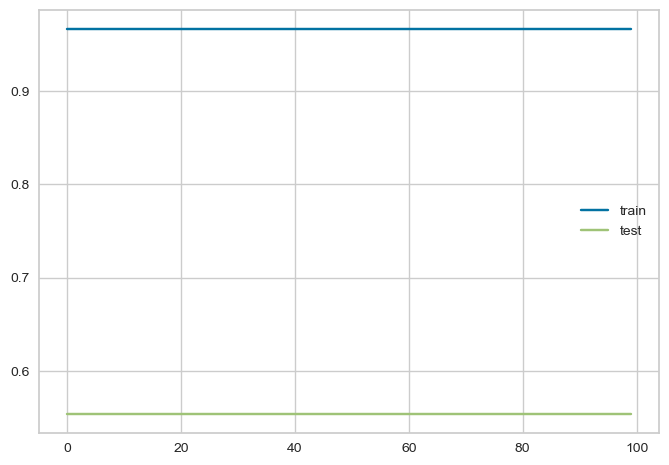

In [68]:
trains = []
tests = []
for i in np.linspace(1, 30, 100):
    svc = SVC(C=i).fit(bow, y_train)
    trains.append(accuracy_score(y_train, svc.predict(vec.transform(X_train))))
    tests.append(accuracy_score(y_test, svc.predict(vec.transform(X_test))))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
Spacy, DeepPavlov

# <a id="10"></a>
## <b>10 <span style='color:#43a842'>|</span> Oversampling</b>
* [Оглавление](#0)

The ratio between the largest class and the rest

In [81]:
rats = []
largest_class = df.Target.value_counts().max()
for i in df.Target.value_counts():
    rats.append(largest_class / i)

In [82]:
rats

[1.0,
 2.021505376344086,
 2.292682926829268,
 2.984126984126984,
 3.547169811320755,
 4.7,
 5.081081081081081]

In [83]:
def oversampling(df, rats, *target):
    oversampl_df = df.loc[df.Target == 'тов']
    for i in range(len(target)):
        mask = df.loc[df.Target == target[i]]
        sampled_class = mask.loc[mask.index.repeat(int(rats[i + 1]))]
        oversampl_df = oversampl_df.append(sampled_class)
    return oversampl_df

In [84]:
new_df = oversampling(df, rats, 'тип', 'назн', 'разм', 'мод', 'бренд', 'мат')
new_df.shape

(1168, 2)

Oversampling distribution

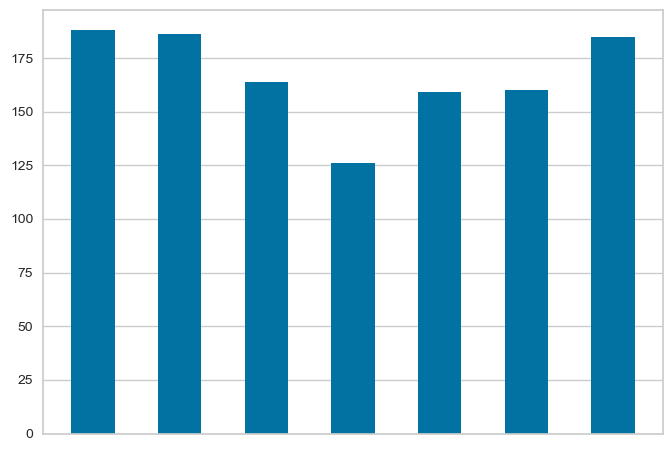

In [85]:
plt.hist(new_df['Target'], bins=new_df['Target'].nunique(), rwidth=0.5)
plt.xticks([])
plt.show()

In [86]:
y_2 = new_df['Target']
X_2 = new_df['Tag']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25, random_state=42)

In [87]:
vec = CountVectorizer(ngram_range=(1, 1)) # строим BoW для слов
bow = vec.fit_transform(X_train_2)

In [88]:
oversample_df = pd.DataFrame({'Models': [],
                              'Accuracy': [],
                              'f1_macro': [],
                              'f1_weighted': []})

In [89]:
def train_for_model(model, df, title):
    clf = model.fit(bow, y_train_2)
    y_pred = clf.predict(vec.transform(X_test))
    info = pd.DataFrame({'Models': [title],
                  'Accuracy': accuracy_score(y_test, y_pred),
                  'f1_macro': f1_score(y_test, y_pred, average='macro'),
                  'f1_weighted': f1_score(y_test, y_pred, average='weighted')})
    df = df.append(info)
    return df

# <a id="10.1"></a>
### <b>10.1 <span style='color:#43a842'>|</span> Log Regression</b>
* [Оглавление](#0)

In [92]:
clf = LogisticRegression(random_state=42).fit(bow, y_train_2)

##### Score oversample model on the new sample

In [93]:
y_pred = clf.predict(vec.transform(X_test_2))
print(classification_report(y_pred, y_test_2))

              precision    recall  f1-score   support

       бренд       0.90      1.00      0.95        37
         мат       0.92      0.92      0.92        39
         мод       1.00      0.93      0.97        45
        назн       0.80      0.95      0.86        37
        разм       0.71      0.81      0.76        27
         тип       0.82      0.57      0.67        70
         тов       0.74      0.92      0.82        37

    accuracy                           0.84       292
   macro avg       0.84      0.87      0.85       292
weighted avg       0.85      0.84      0.84       292



##### Score oversample model on the first sample (disbalanced)

In [94]:
y_predicted = clf.predict(vec.transform(X_test))
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

       бренд       0.92      1.00      0.96        12
         мат       0.90      0.82      0.86        11
         мод       0.82      0.90      0.86        10
        назн       0.91      0.95      0.93        21
        разм       0.92      0.86      0.89        14
         тип       0.83      0.66      0.73        29
         тов       0.89      1.00      0.94        42

    accuracy                           0.88       139
   macro avg       0.88      0.88      0.88       139
weighted avg       0.88      0.88      0.88       139



In [95]:
lr_info = train_for_model(LogisticRegression(random_state=42), oversample_df, 'OS Log Rega')
lr_info

,Models,Accuracy,f1_macro,f1_weighted
0,OS Log Rega,0.884892,0.881142,0.889697


In [96]:
rf_info = train_for_model(RandomForestClassifier(random_state=42), lr_info, 'OS Random Forest')
rf_info

,Models,Accuracy,f1_macro,f1_weighted
0,OS Log Rega,0.884892,0.881142,0.889697
0,OS Random Forest,0.892086,0.879641,0.896893


In [97]:
dt_info = train_for_model(DecisionTreeClassifier(random_state=42), rf_info, 'OS Decision Tree')
dt_info

,Models,Accuracy,f1_macro,f1_weighted
0,OS Log Rega,0.884892,0.881142,0.889697
0,OS Random Forest,0.892086,0.879641,0.896893
0,OS Decision Tree,0.892086,0.879051,0.896186


# <a id="10.2"></a>
### <b>10.2 <span style='color:#43a842'>|</span> Finish Results</b>
* [Оглавление](#0)

In [98]:
all_info = train_for_model(SVC(random_state=42), dt_info, 'OS SVC')
all_info

,Models,Accuracy,f1_macro,f1_weighted
0,OS Log Rega,0.884892,0.881142,0.889697
0,OS Random Forest,0.892086,0.879641,0.896893
0,OS Decision Tree,0.892086,0.879051,0.896186
0,OS SVC,0.892086,0.879641,0.896893


<a id="11"></a>
## <b>11 <span style='color:#43a842'>|</span> Final GridSearch</b>
* [Оглавление](#0)

In [99]:
params = {"C": [0.01, 0.1, 1, 10, 100, 1000], 
      "penalty": ['l1', 'l2', 'elasticnet'],
      "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [100]:
%%time
search = GridSearchCV(clf, params, cv=10).fit(bow, y_train_2)

CPU times: user 19.3 s, sys: 68.1 ms, total: 19.4 s
Wall time: 19.4 s


In [101]:
best_lr = search.best_estimator_

In [102]:
get_metrics(best_lr, 'Remastered LR')

,Models,Accuracy,f1_macro,f1_weighted
0,Remastered LR,0.884892,0.881142,0.889697


<a id="12"></a>
## <b>12 <span style='color:#43a842'>|</span> Сonclusion</b>
* [Оглавление](#0)

Из-за недостаточного количества данных в задаче, любой перекос в сторону одного из классов оказывался критическим. 
Для преодоления этой проблемы было принято решение максимально расширить все классы путем добавления n_i chunks по таргету, 
где n_i = int((shape[0] самого большого класса) / (shape[0] i-го класса)). После обучения модели на такой выборке был получен довольно неплохой результат на изначальной тестовой выборке, которая была несбалансированной. Были изучены различные методы борьбы с недостатком данных и дисбалансом классов, и была подобрана оптимальная модель для решения задачи многоклассовой классификации с помощью логистической регрессии